<a href="https://colab.research.google.com/github/purvabadhe/AI-in-Finance-/blob/main/Time_Series_Project_Gold_Prices_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1:-  Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import yfinance as yf

In [ ]:
tickers = ["GC=F"]

# Step 2:- Downloading the Data

In [ ]:
df = yf.download(tickers,period = "5y").Close
df

[*********************100%%**********************]  1 of 1 completed


Date
2018-11-05    1229.800049
2018-11-06    1223.800049
2018-11-07    1226.199951
2018-11-08    1222.900024
2018-11-09    1206.400024
                 ...     
2023-10-30    1996.199951
2023-10-31    1985.199951
2023-11-01    1978.800049
2023-11-02    1985.599976
2023-11-03    1994.900024
Name: Close, Length: 1258, dtype: float64

### Applying Forward Fill to the Data to get Weekend Data

In [ ]:
df = df.resample('1D').mean()

In [ ]:
df

Date
2018-11-05    1229.800049
2018-11-06    1223.800049
2018-11-07    1226.199951
2018-11-08    1222.900024
2018-11-09    1206.400024
                 ...     
2023-10-30    1996.199951
2023-10-31    1985.199951
2023-11-01    1978.800049
2023-11-02    1985.599976
2023-11-03    1994.900024
Freq: D, Name: Close, Length: 1825, dtype: float64

In [ ]:
df = df.resample('1D').mean().ffill()

In [ ]:
df

Date
2018-11-05    1229.800049
2018-11-06    1223.800049
2018-11-07    1226.199951
2018-11-08    1222.900024
2018-11-09    1206.400024
                 ...     
2023-10-30    1996.199951
2023-10-31    1985.199951
2023-11-01    1978.800049
2023-11-02    1985.599976
2023-11-03    1994.900024
Freq: D, Name: Close, Length: 1825, dtype: float64

In [ ]:
df.to_csv("data_csv")

In [ ]:
df.to_excel("data1.xlsx")

In [ ]:
data_gold = pd.read_csv('/content/data_csv', index_col = 'Date',parse_dates = True)

In [ ]:
data_gold.head(10)

,Close
Date,
2018-11-05,1229.800049
2018-11-06,1223.800049
2018-11-07,1226.199951
2018-11-08,1222.900024
2018-11-09,1206.400024
2018-11-10,1206.400024
2018-11-11,1206.400024
2018-11-12,1201.300049
2018-11-13,1199.199951


In [ ]:
data_gold.columns

Index(['Close'], dtype='object')

In [ ]:
data_gold1 = pd.DataFrame(data_gold)

In [ ]:
data_gold1.rename(columns={'Date':"DATE",'Close':'PRICE'}, inplace=True)

In [ ]:
print(data_gold1)

                  PRICE
Date                   
2018-11-05  1229.800049
2018-11-06  1223.800049
2018-11-07  1226.199951
2018-11-08  1222.900024
2018-11-09  1206.400024
...                 ...
2023-10-30  1996.199951
2023-10-31  1985.199951
2023-11-01  1978.800049
2023-11-02  1985.599976
2023-11-03  1994.900024

[1825 rows x 1 columns]


In [ ]:
data_gold1.columns

Index(['PRICE'], dtype='object')

In [ ]:
data_gold1.head()

,PRICE
Date,
2018-11-05,1229.800049
2018-11-06,1223.800049
2018-11-07,1226.199951
2018-11-08,1222.900024
2018-11-09,1206.400024


In [ ]:
data_gold1.dtypes

PRICE    float64
dtype: object

In [ ]:
data_gold1.describe()

,PRICE
count,1825.000000
mean,1716.752382
std,218.398812
min,1199.199951
25%,1564.099976
50%,1783.500000
75%,1879.900024
max,2051.500000


# Step 3:- Checking for White Noise

In [ ]:
wn = np.random.normal(loc = data_gold1.PRICE.mean(), scale = data_gold.PRICE.std(), size = len(data_gold))

In [ ]:
data_gold1['white_noise'] = wn

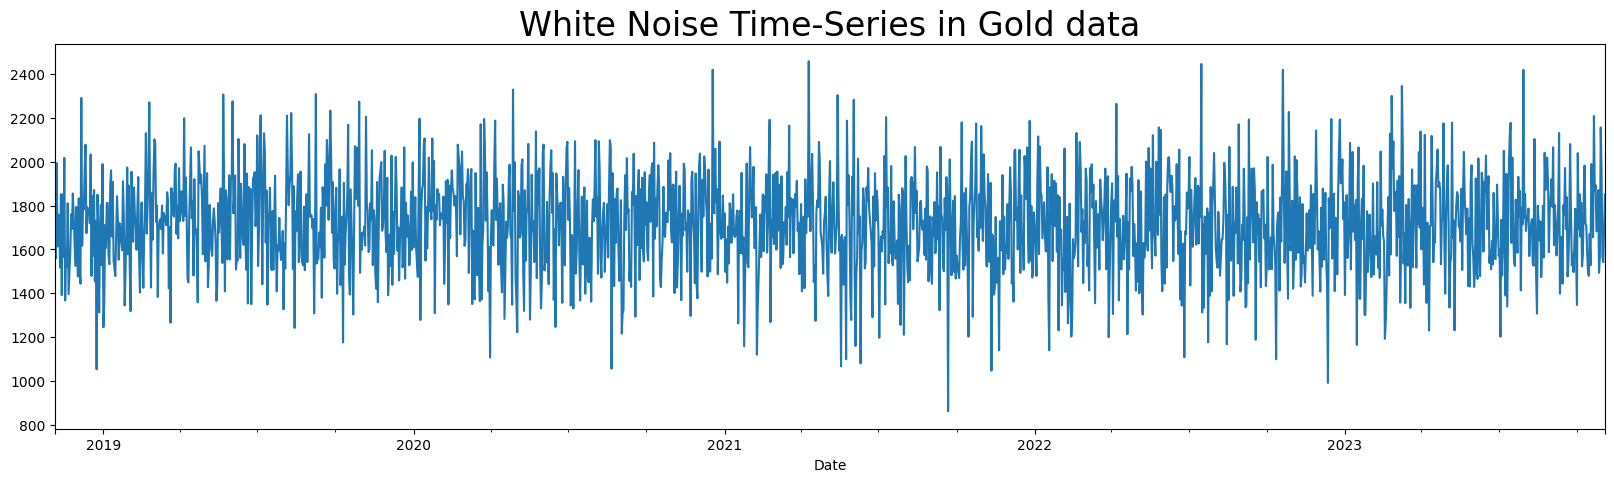

In [ ]:
data_gold1.white_noise.plot(figsize = (20,5))
plt.title("White Noise Time-Series in Gold data", size= 24)
plt.show()

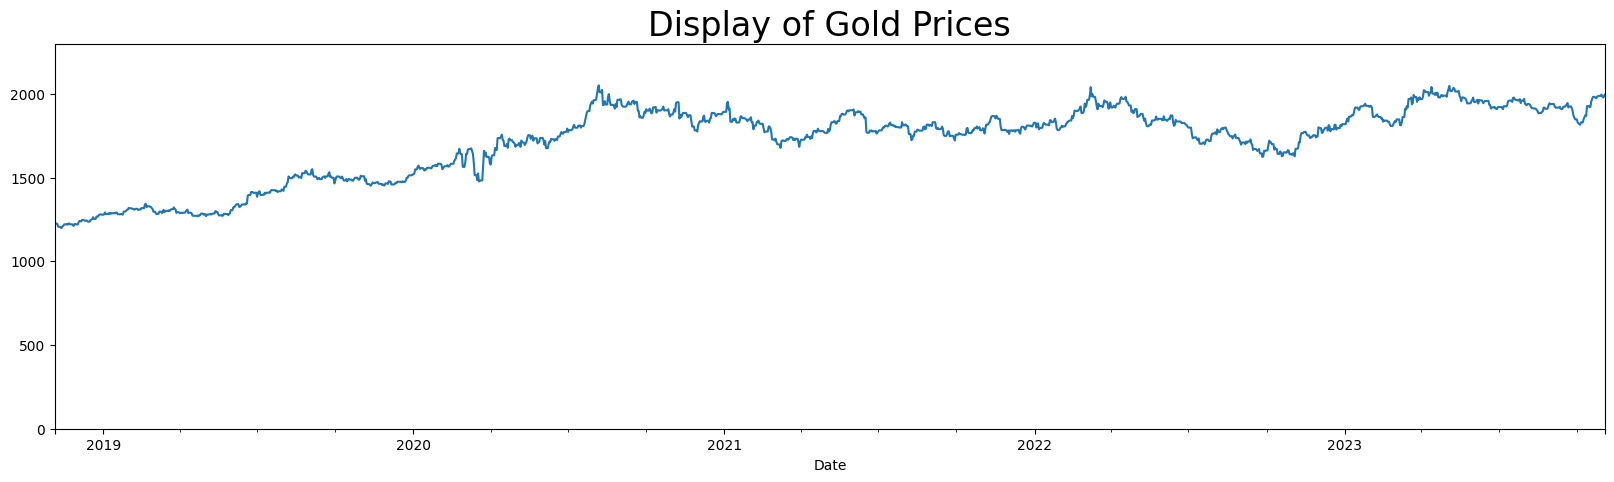

In [ ]:
data_gold1.PRICE.plot(figsize=(20,5))
plt.title("Display of Gold Prices", size = 24)
plt.ylim(0,2300)
plt.show()

In [ ]:
data_gold1.head()

,PRICE,white_noise
Date,,
2018-11-05,1229.800049,1811.167259
2018-11-06,1223.800049,1559.567889
2018-11-07,1226.199951,1993.357284
2018-11-08,1222.900024,1613.849307
2018-11-09,1206.400024,1759.307262


# Step 4:-  Exploratory Data Analysis

In [ ]:
data_gold2 = pd.read_csv('/content/data_csv', index_col = 'Date',parse_dates = True)

In [ ]:
data_gold2 = pd.DataFrame(data_gold2)

In [ ]:
data_gold2.rename(columns={'Date':"DATE",'Close':'PRICE'}, inplace=True)

In [ ]:
data_gold2.head()

,PRICE
Date,
2018-11-05,1229.800049
2018-11-06,1223.800049
2018-11-07,1226.199951
2018-11-08,1222.900024
2018-11-09,1206.400024


In [ ]:
# Check for Null values
data_gold2.isna().sum()

PRICE    0
dtype: int64

In [ ]:
data_gold2.isnull().sum()

PRICE    0
dtype: int64

### Check for Normality in Data

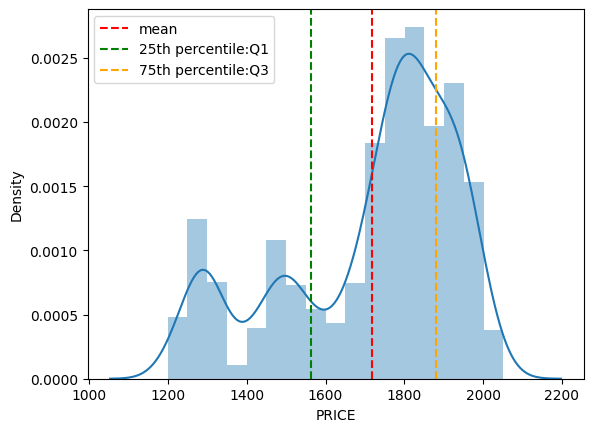

In [ ]:
sns.distplot(data_gold2['PRICE'])
plt.axvline(x=np.mean(data_gold2['PRICE']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(data_gold2['PRICE'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(data_gold2['PRICE'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

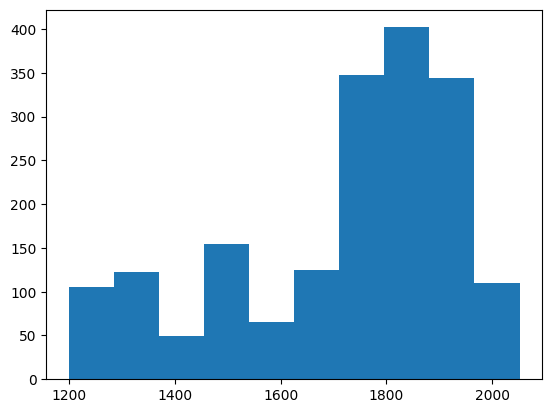

In [ ]:
plt.hist(data_gold2["PRICE"])
plt.show()

### Look for Outliers in the Data

<Axes: >

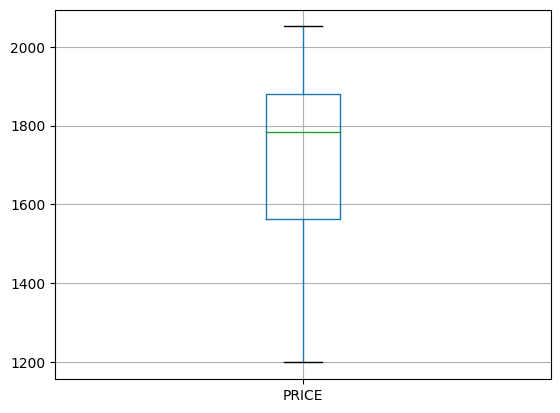

In [ ]:
data_gold2.boxplot(column=["PRICE"])

### Check for Trend in Data

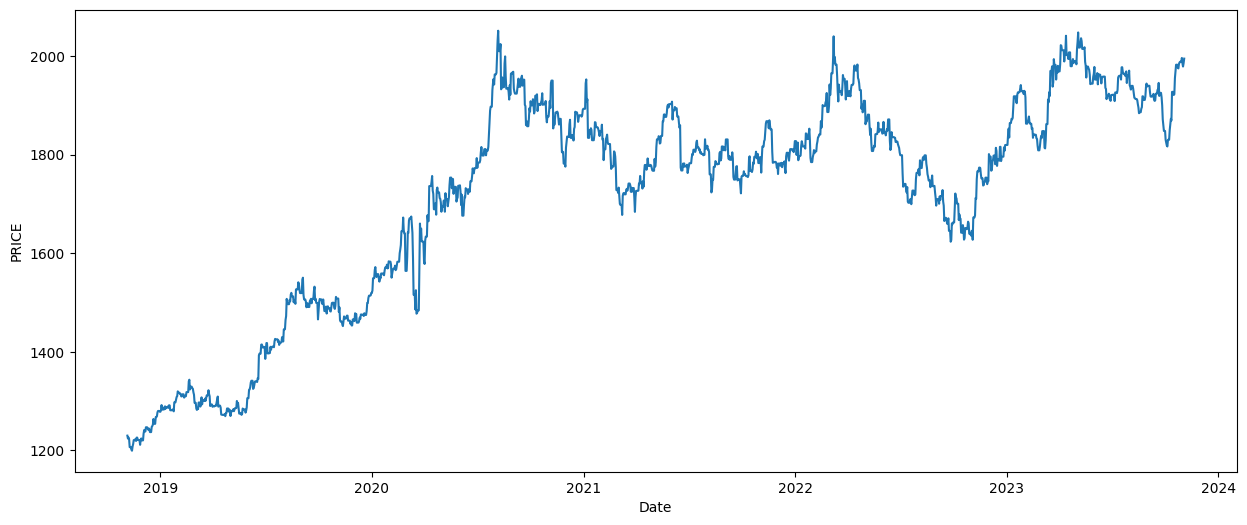

In [ ]:
plt.figure(figsize=(15,6))
series1=sns.lineplot(x='Date',y='PRICE',data=data_gold2)
plt.show(series1)

#### Interpretation:-  An upward trend is visible over the data. It also displays a linear and constant trend over time. The pattern seems irregular. There is no seasonality observable in the pattern

### Visualizing Sum of all the Prices each year

In [ ]:
data_gold2.head()

,PRICE
Date,
2018-11-05,1229.800049
2018-11-06,1223.800049
2018-11-07,1226.199951
2018-11-08,1222.900024
2018-11-09,1206.400024


In [ ]:
data_gold2.index

DatetimeIndex(['2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08',
               '2018-11-09', '2018-11-10', '2018-11-11', '2018-11-12',
               '2018-11-13', '2018-11-14',
               ...
               '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-28',
               '2023-10-29', '2023-10-30', '2023-10-31', '2023-11-01',
               '2023-11-02', '2023-11-03'],
              dtype='datetime64[ns]', name='Date', length=1825, freq=None)

In [ ]:
data_gold2.columns

Index(['PRICE'], dtype='object')

In [ ]:
df1 = data_gold2

In [ ]:
df1.head()

,PRICE
Date,
2018-11-05,1229.800049
2018-11-06,1223.800049
2018-11-07,1226.199951
2018-11-08,1222.900024
2018-11-09,1206.400024


In [ ]:
df1['year'] = df1.index.year
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['weekday'] = df1.index.weekday
df1['weekday'] = np.where(df1.weekday == 0, 7, df1.weekday)
df1_year = data_gold2[['PRICE','year']].groupby(by='year').sum().reset_index()

df1_year

,year,PRICE
0,2018,70451.200439
1,2019,508085.098633
2,2020,648155.399292
3,2021,656340.799561
4,2022,657462.200195
5,2023,592578.399292


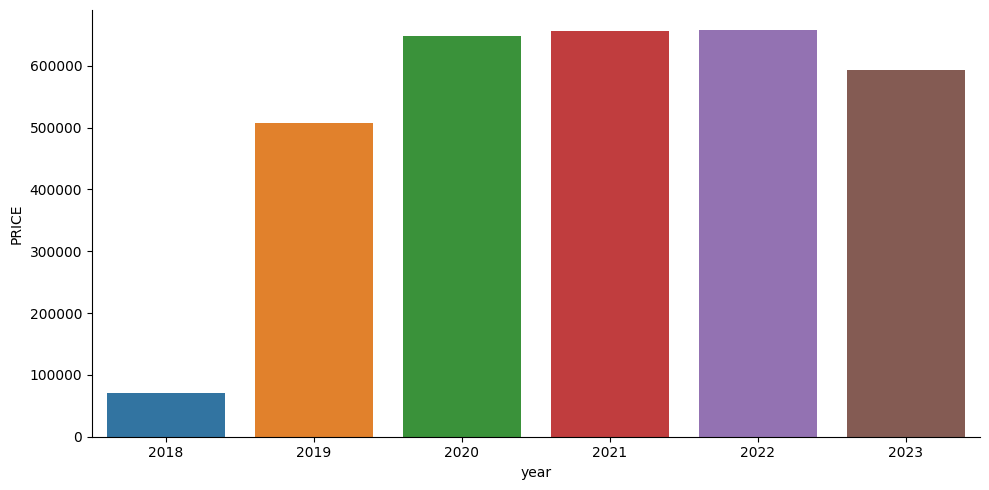

In [ ]:
sns.catplot(x='year',y='PRICE',data=df1_year,kind='bar',aspect=2)

#### Monthly and Yearly Gold Trend and Seasonality

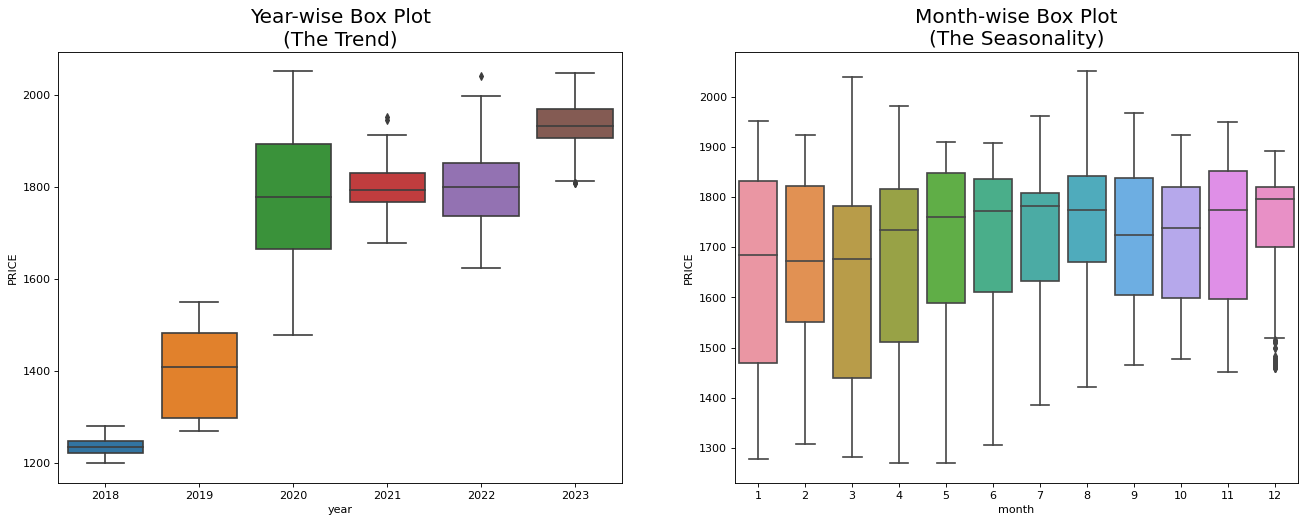

In [ ]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='PRICE', data=data_gold2, ax=axes[0])
sns.boxplot(x='month', y='PRICE', data=data_gold2.loc[~data_gold2.year.isin([2018, 2023]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

Weekly Gold Price

[Text(0.5, 1.0, 'Weekly Gold Price')]

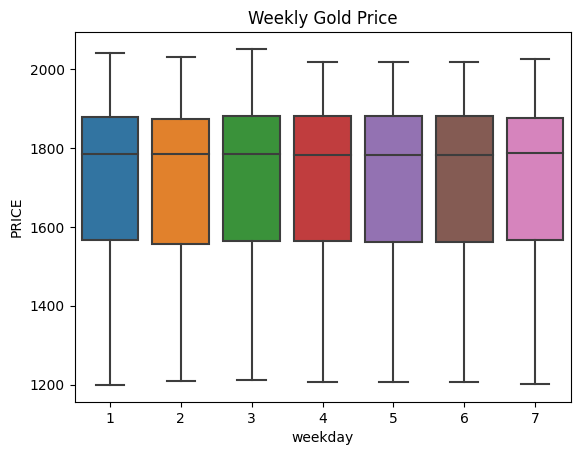

In [ ]:
plot = sns.boxplot(x='weekday', y='PRICE', data=df1)
plot.set(title='Weekly Gold Price')

# Step 5:-  Quantile-Quantile (QQ PLOT)

In [ ]:
import scipy.stats
import pylab

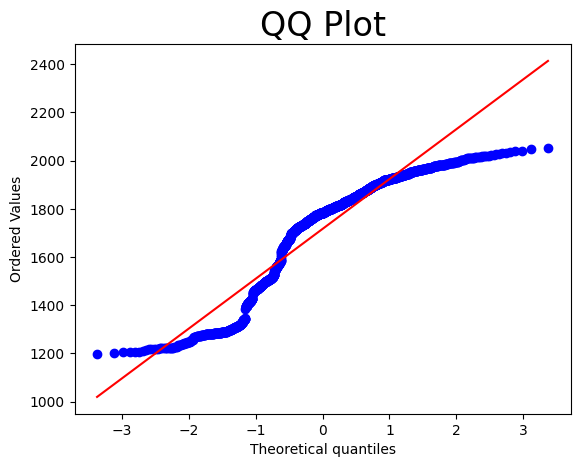

In [ ]:
scipy.stats.probplot(data_gold2.PRICE, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

Interpretation - quantile-quantile plot is a graphical tool used in statistics to assess whether a dataset follows a particular probability distribution, typically the normal distribution.

This suggests a light tailed QQ Plot
That indicates the data's tails do not extend as far as the tails of the reference distribution, and the data is less extreme in its values.

In [ ]:
data_gold2.head()

,PRICE,year,month,day,weekday
Date,,,,,
2018-11-05,1229.800049,2018,11,5,7
2018-11-06,1223.800049,2018,11,6,1
2018-11-07,1226.199951,2018,11,7,2
2018-11-08,1222.900024,2018,11,8,3
2018-11-09,1206.400024,2018,11,9,4


In [ ]:
data_gold3 = pd.read_csv('/content/data_csv', index_col = 'Date',parse_dates = True)

In [ ]:
data_gold3 = pd.DataFrame(data_gold3)

In [ ]:
data_gold3.rename(columns={'Date':"DATE",'Close':'PRICE'}, inplace=True)

In [ ]:
data_gold3.head()

,PRICE
Date,
2018-11-05,1229.800049
2018-11-06,1223.800049
2018-11-07,1226.199951
2018-11-08,1222.900024
2018-11-09,1206.400024


# Step 6:-  Check for Stationarity -  Augmented Dickey Fuller Test

In [ ]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(data_gold3['PRICE'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -1.966934
p-value                    0.301257
# lags used               11.000000
# observations          1813.000000
critical value (1%)       -3.433962
critical value (5%)       -2.863136
critical value (10%)      -2.567619
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


The ADF test suggests that the data is non-stationary and has a unit root, meaning it exhibits a certain level of persistence or trend. As we wanted stationary data, we need to apply differencing or some other transformation to remove the unit root and make the data stationary.

Check Stationarity by plotting Mean and Standard Deviation of Close Prices

In [ ]:
def test_stationarity(timeseries):


    mean = timeseries.rolling(12).mean()
    std = timeseries.rolling(12).std()

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(mean, color='red', label='Rolling Mean')
    std = plt.plot(std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Mean and Standard Deviation to check Stationarity')
    plt.show(block=False)

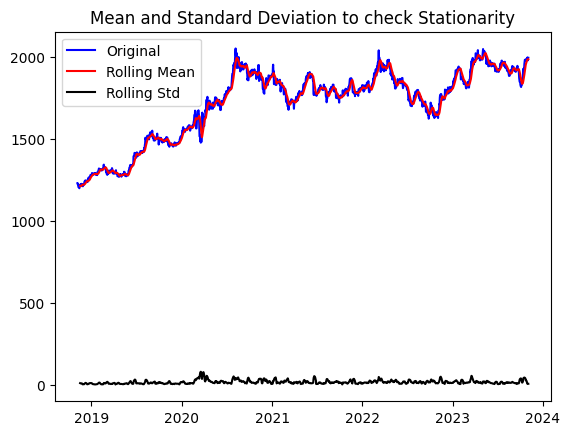

In [ ]:
test_stationarity(data_gold3['PRICE'])

1) With the above plot its clear that mean is increasing with time though there is slight variation in Standard Deviation.

2) From the ADF Test, we have understood that the p-value is not less than 0.05, hence it has failed to reject the null hypothesis. So we infer that data has a unit root and its not stationary. Further Differencing needs to be applied to make it stationary

# Step 7:- Check for Seasonality -  Seasonal Decomposition

Determine Error, Trend and Seasonality An ETS model has three main components: error, trend, and seasonality. Each can be applied either additively, multiplicatively, or not at all. We will use the above Times Series Decomposition Plot to determine the additive or multiplicative property of the thre components.

Trend - If the trend plot is linear then we apply it additively (A). If the trend line grows or shrinks exponentially, we apply it multiplicatively (M). If there is no clear trend, no trend component is included (N).

Seasonal - If the peaks and valleys for seasonality are constant over time, we apply it additively (A). If the size of the seasonal fluctuations tends to increase or decrease with the level of time series, we apply it multiplicatively (M). If there is no seasonality, it is not applied (N).

Error - If the error plot has constant variance over time (peaks and valleys are about the same size), we apply it additively (A). If the error plot is fluctuating between large and small errors over time, we apply it multiplicatively (M).

There is slight change in the variance with respect to time and trend plot is increasing linearly as per seen above. Hence we apply additive plot

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib

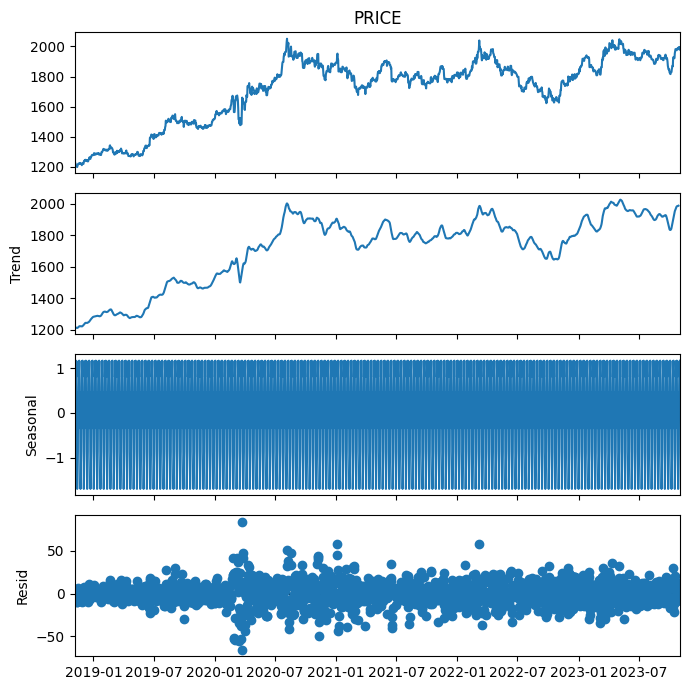

In [ ]:
matplotlib.rc('figure', figsize=(7, 7))
seasonality = seasonal_decompose(data_gold3.PRICE,period=10, model = "additive")
seasonality.plot()
plt.show()

In [ ]:
len(data_gold3)

1825

# Step 8:-  ACF & PACF Plots

In [ ]:
import statsmodels.graphics.tsaplots as sgt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(20,18), 'figure.dpi':120})

PLOTS of Original Series

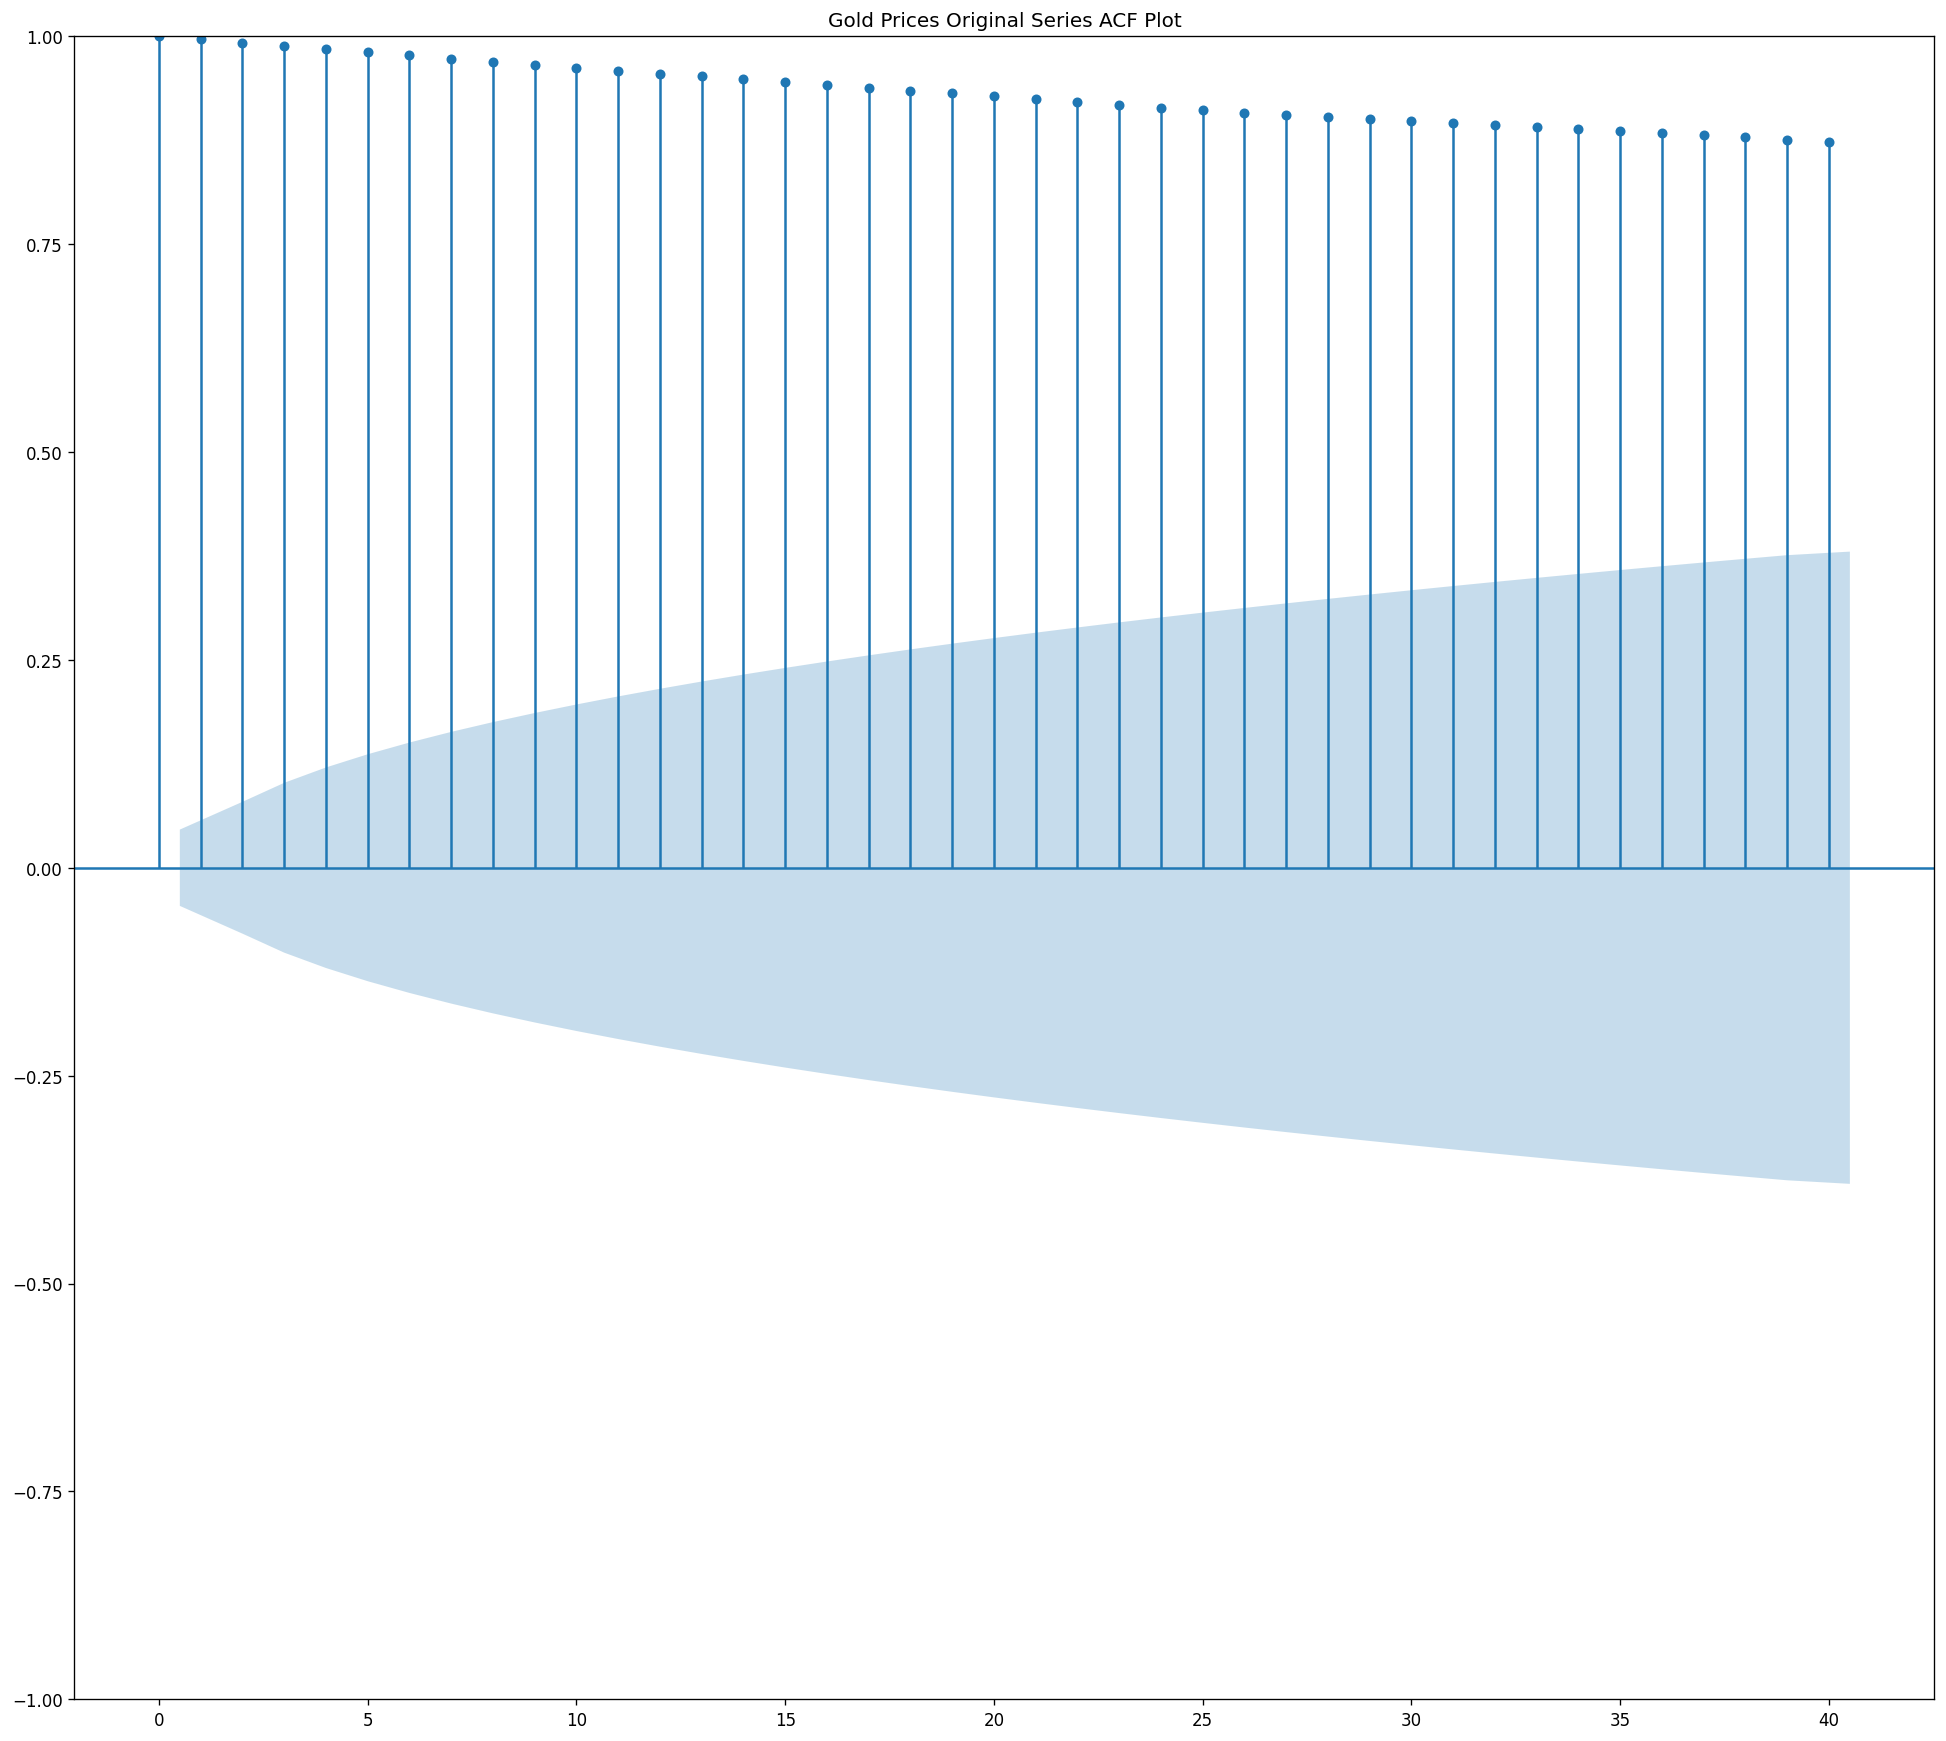

In [ ]:
title = 'Gold Prices Original Series ACF Plot'
lags = 40
plot_acf(data_gold3['PRICE'],title=title,lags=lags);

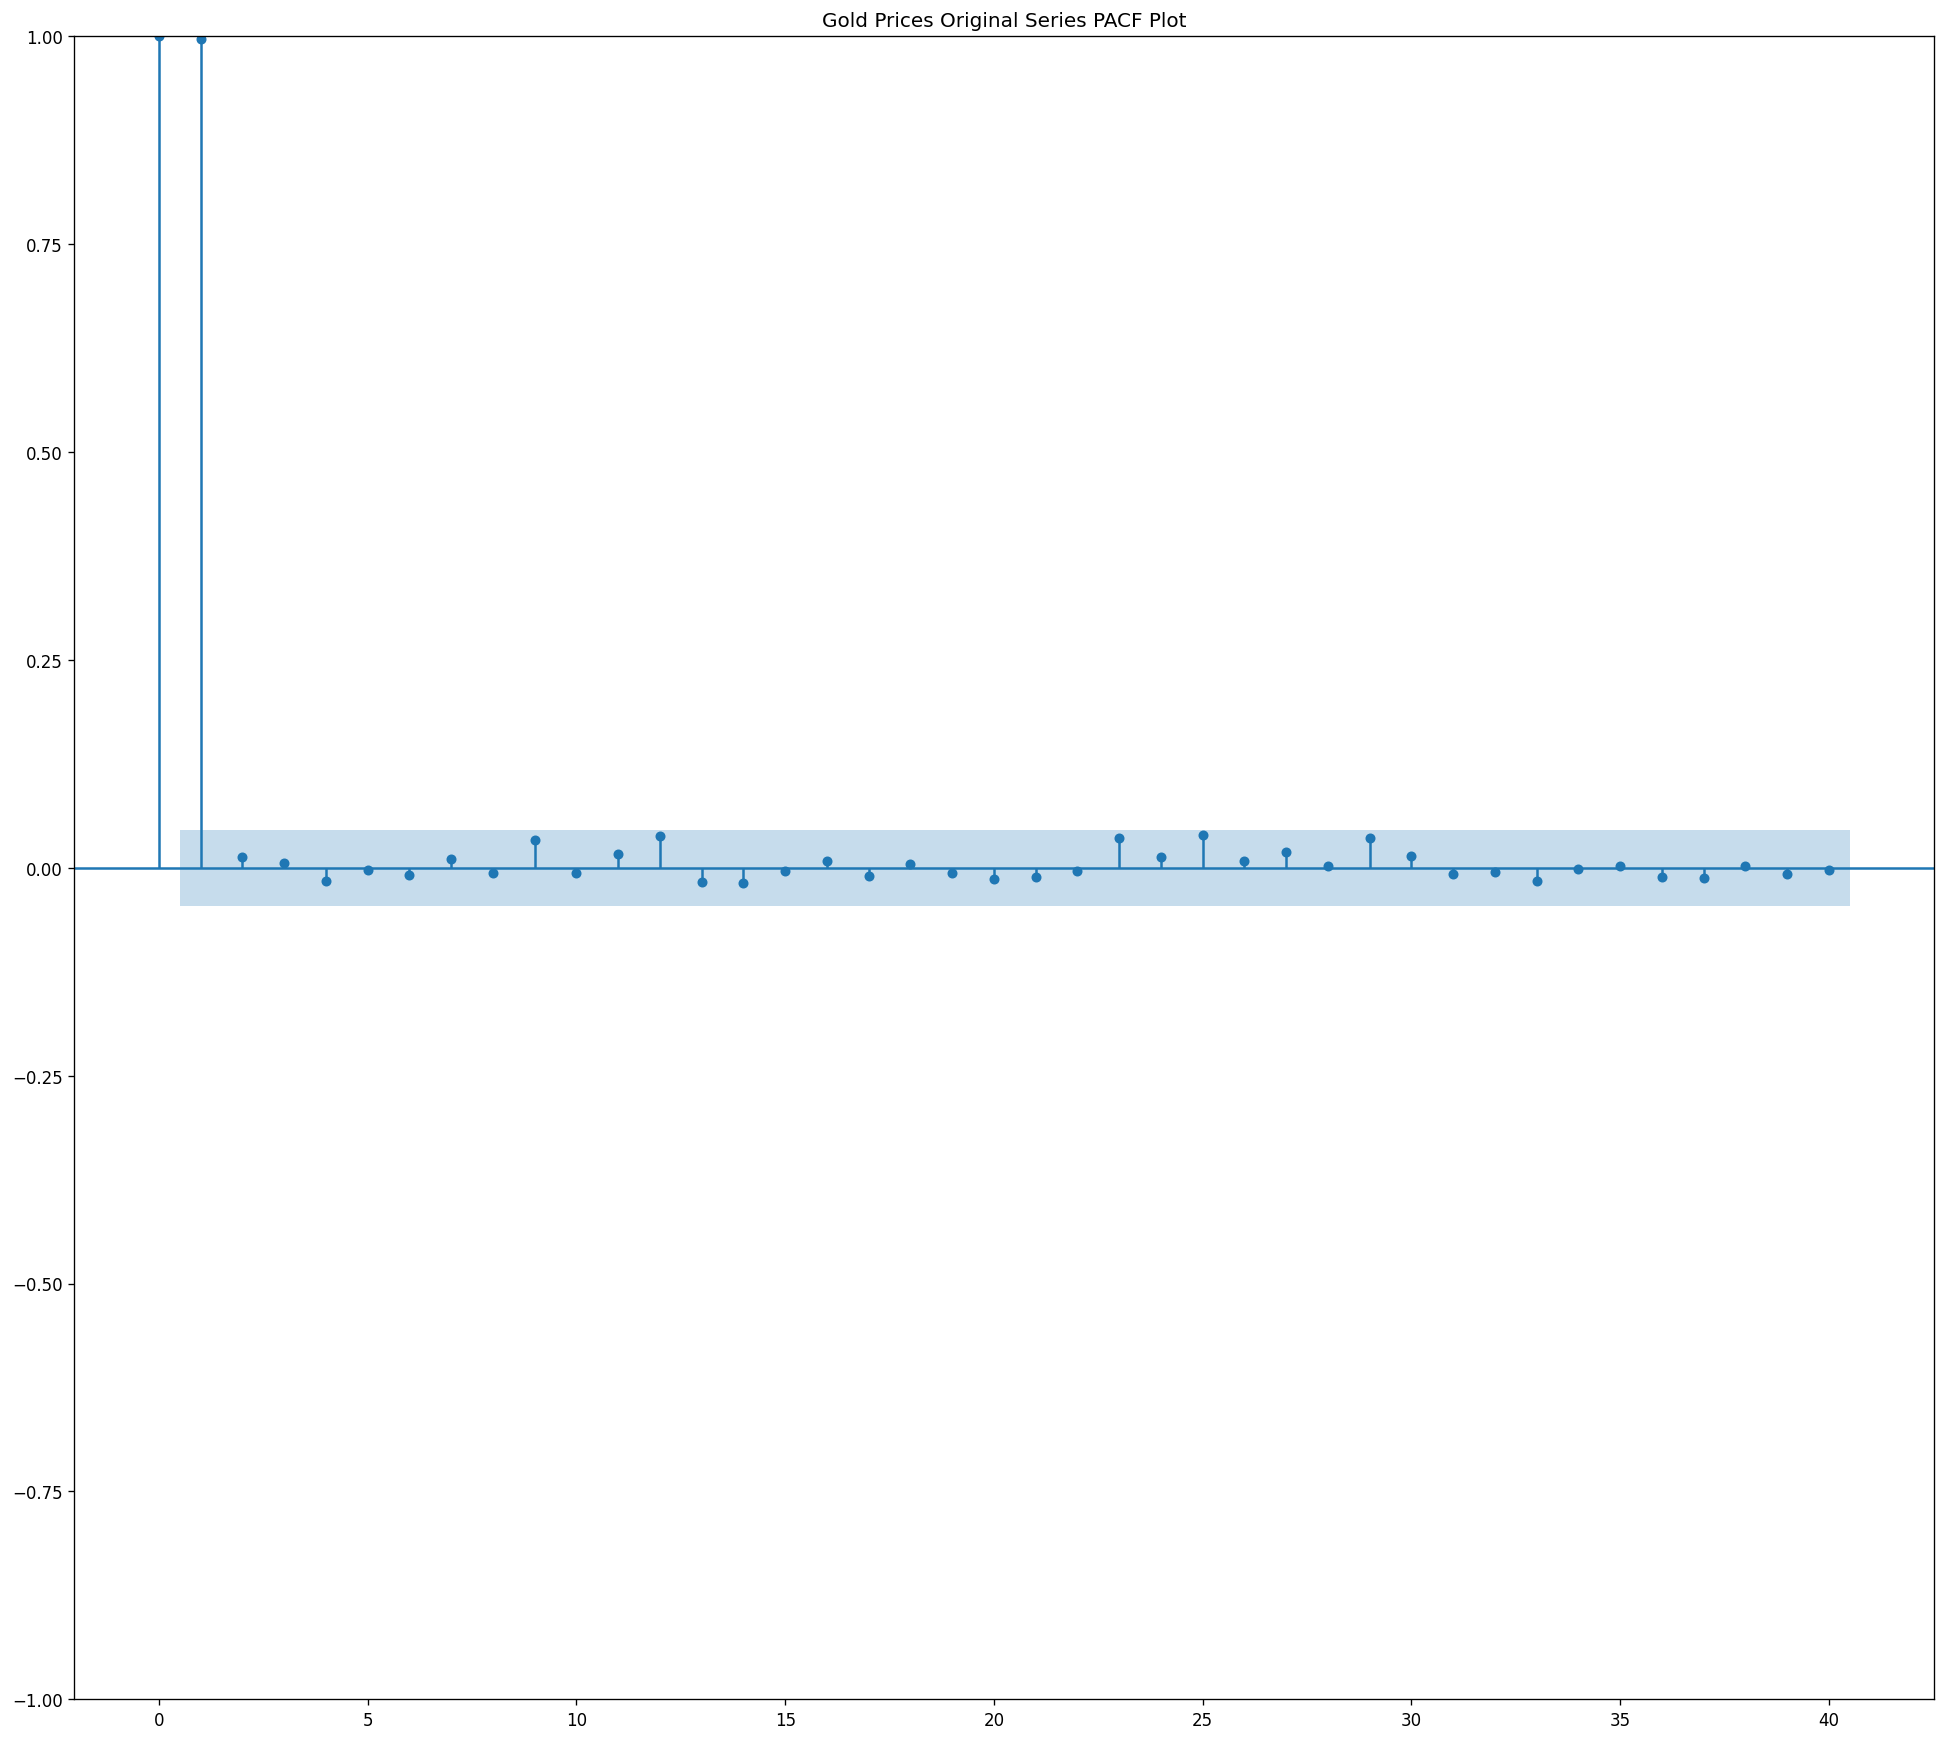

In [ ]:
title = 'Gold Prices Original Series PACF Plot'
lags = 40
plot_pacf(data_gold3['PRICE'],title=title,lags=lags);

# Plotting Differenced Data

Plotting ACF

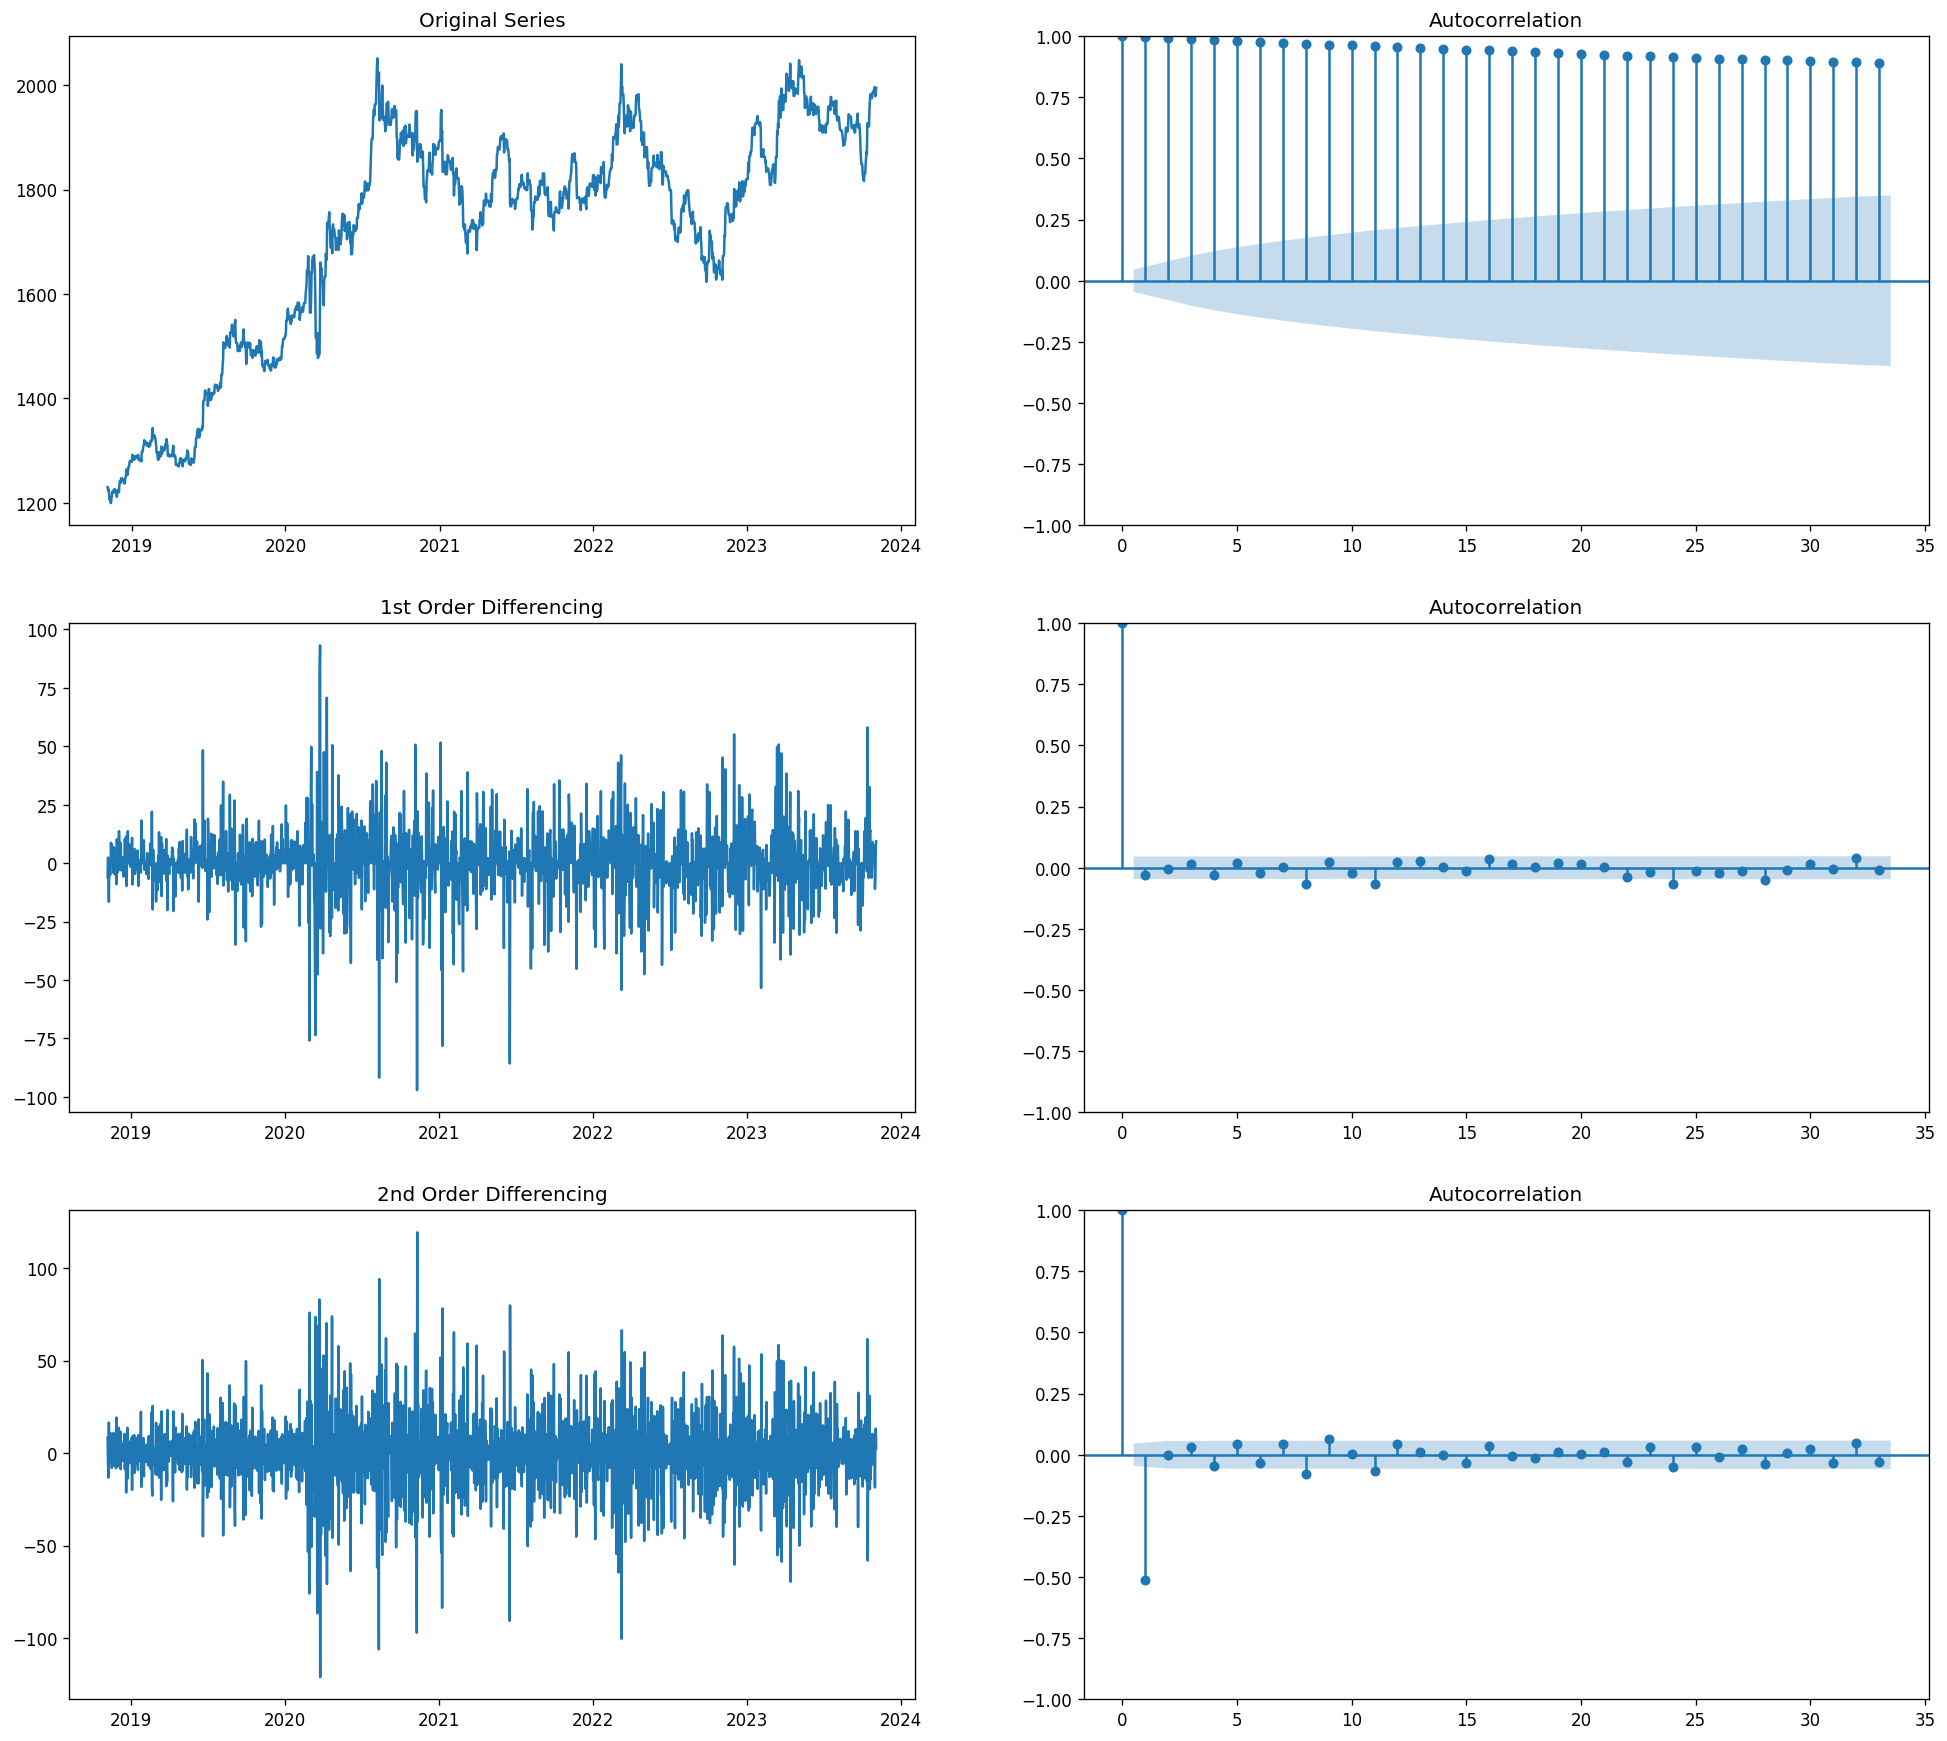

In [ ]:
# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(data_gold3.PRICE); axes[0, 0].set_title('Original Series')
plot_acf(data_gold3.PRICE, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data_gold3.PRICE.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data_gold3.PRICE.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data_gold3.PRICE.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data_gold3.PRICE.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Plotting PACF

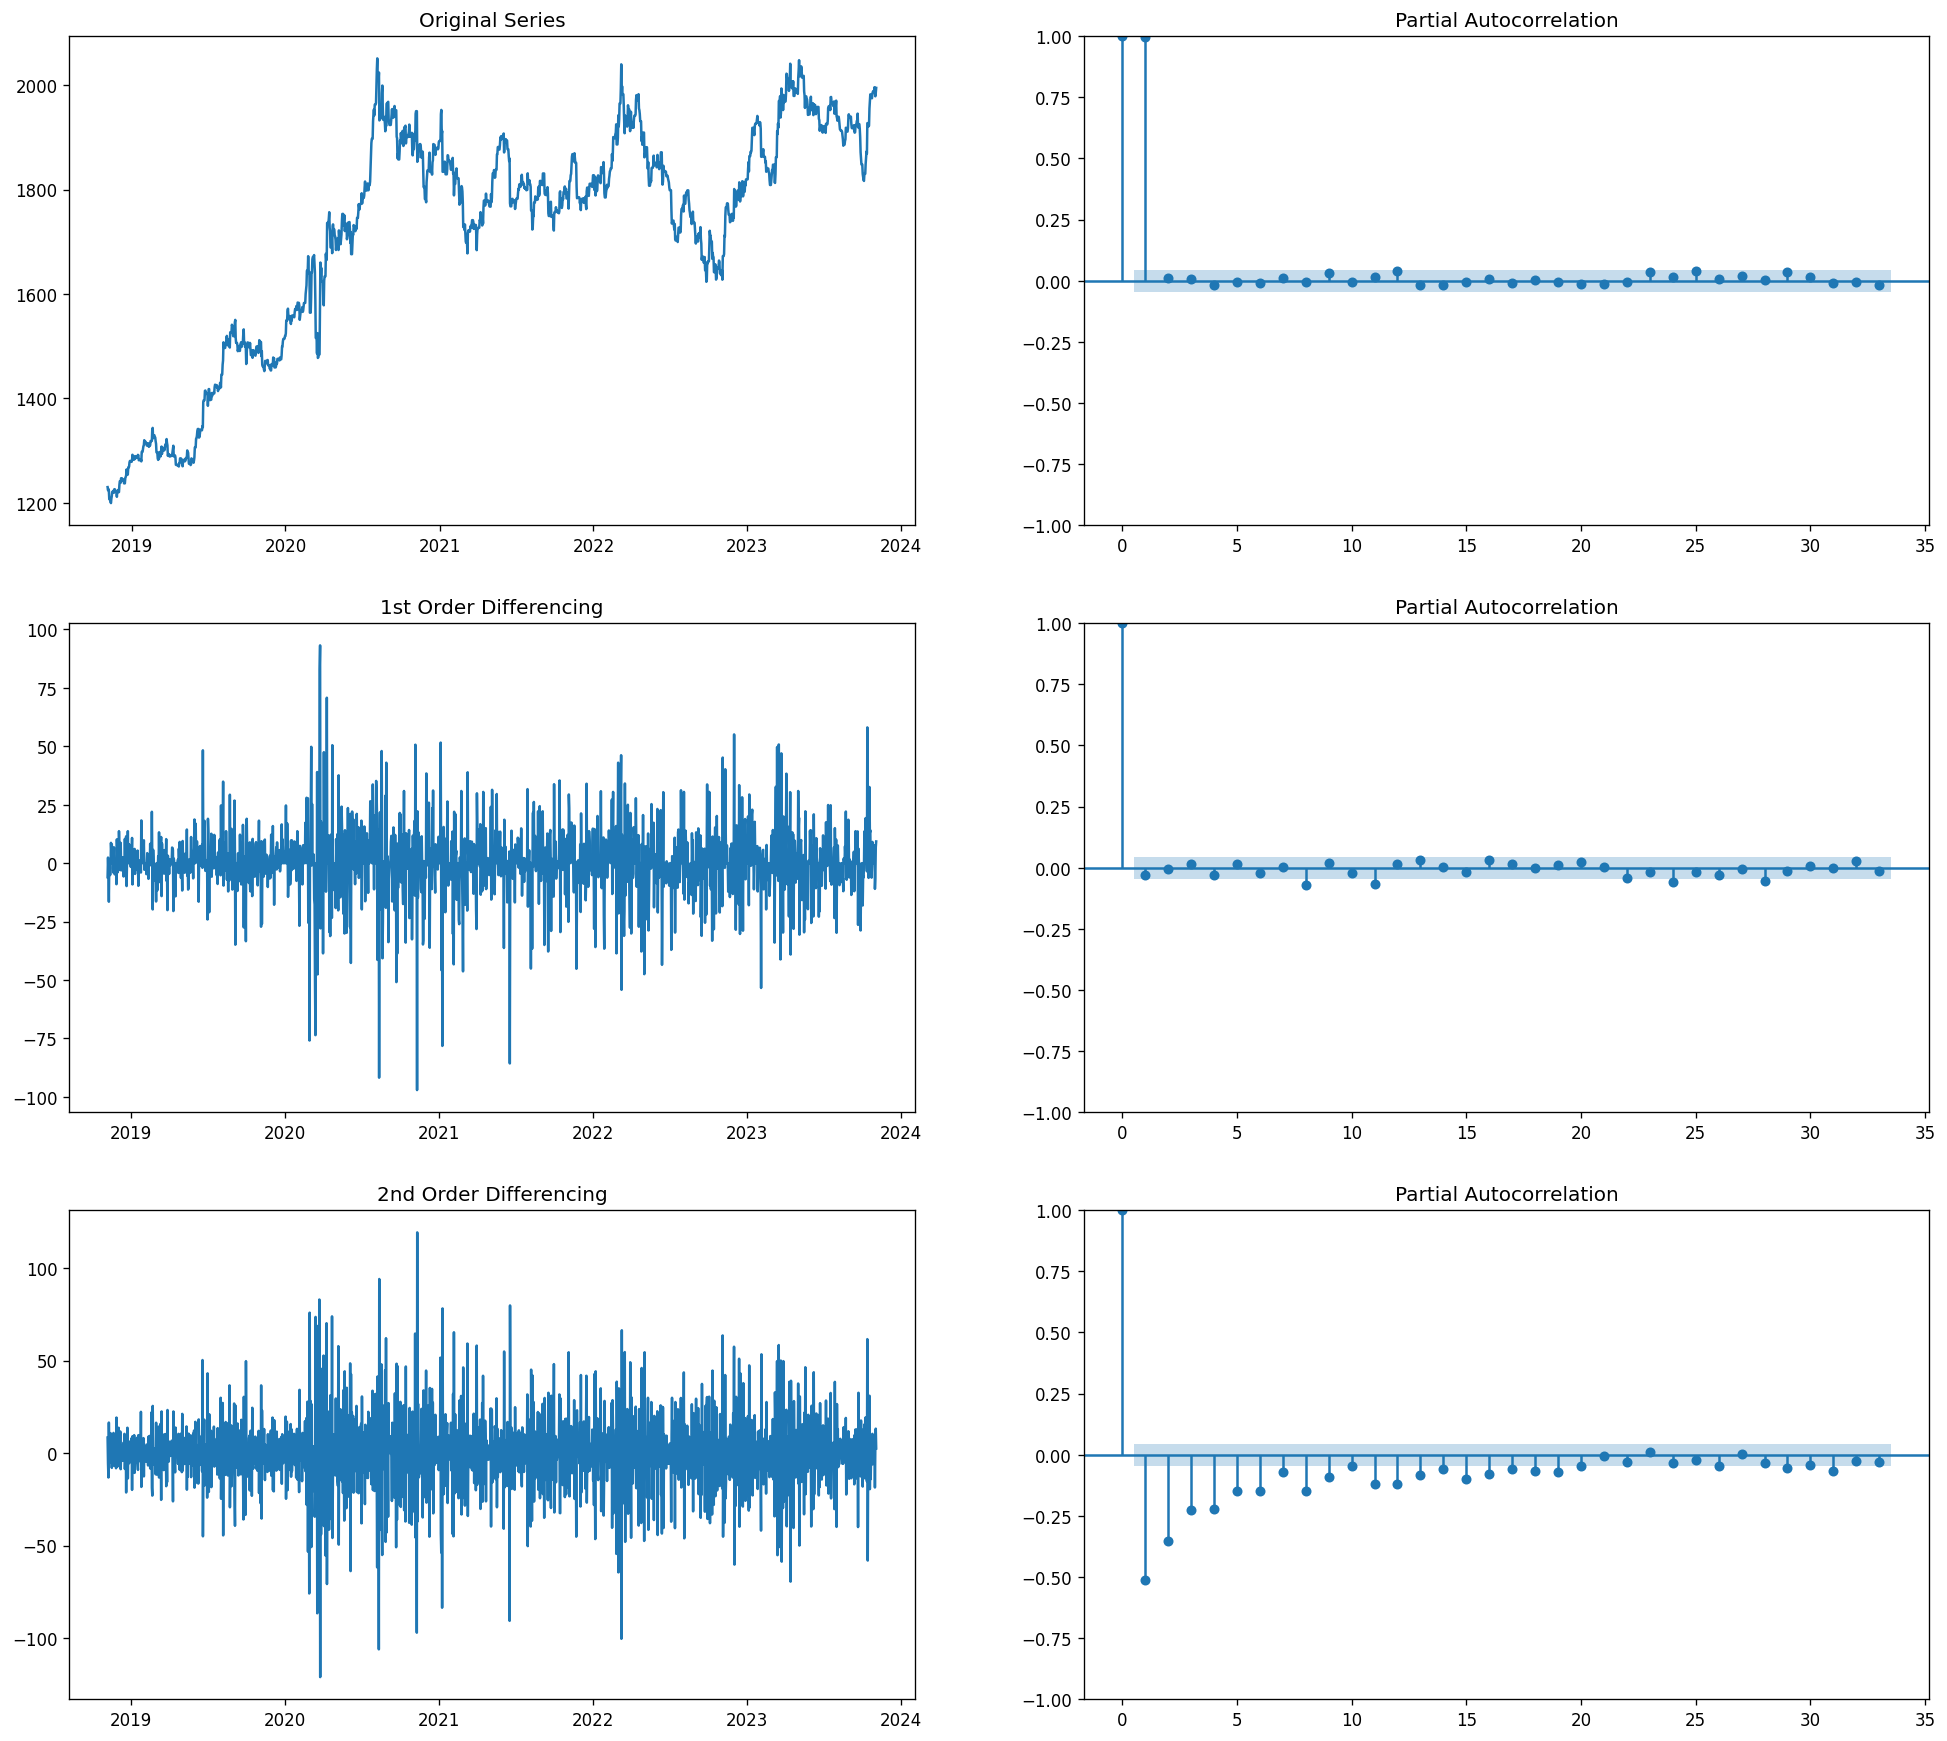

In [ ]:
# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(data_gold3.PRICE); axes[0, 0].set_title('Original Series')
plot_pacf(data_gold3.PRICE, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data_gold3.PRICE.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(data_gold3.PRICE.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data_gold3.PRICE.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(data_gold3.PRICE.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

There is a decay in 2nd order differenced PACF plot and a sharp cut-off in ACF plot. Hence we are considering 2nd order differencing for our data

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.7 MB/s eta 0:00:00


In [ ]:
#check number of difference required for a stationary series

from pmdarima.arima.utils import ndiffs

In [ ]:

y = data_gold3.PRICE
## Adf Test
print('ADF :', ndiffs(y, test='adf') )


ADF : 1


# Step 9:-  Apply Differencing to make data stationary

First Order Differencing

In [ ]:
data_diff = data_gold3.PRICE.diff()
data_diff.dropna(inplace=True)
adf_test(data_diff)

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.460058e+01
p-value                 4.172288e-27
# lags used             1.000000e+01
# observations          1.813000e+03
critical value (1%)    -3.433962e+00
critical value (5%)    -2.863136e+00
critical value (10%)   -2.567619e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Second Order Differencing

In [ ]:
data_diff1 = data_gold3.PRICE.diff().diff()
data_diff1.dropna(inplace=True)
adf_test(data_diff1)

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.745340e+01
p-value                 4.639413e-30
# lags used             1.900000e+01
# observations          1.803000e+03
critical value (1%)    -3.433982e+00
critical value (5%)    -2.863144e+00
critical value (10%)   -2.567624e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Data has become stationary after 1st order differencing

# Step 10:-  Apply Models

AR(1) MODEL

In [ ]:
#from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
import statsmodels.api as sm

In [ ]:
model_gold = sm.tsa.arima.ARIMA(data_gold3['PRICE'], order = (0, 1, 0))
gold_010 = model_gold.fit()
print(gold_010.summary())

                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                 1825
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -7437.353
Date:                Fri, 03 Nov 2023   AIC                          14876.705
Time:                        11:12:15   BIC                          14882.214
Sample:                    11-05-2018   HQIC                         14878.737
                         - 11-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       203.7960      3.101     65.727      0.000     197.719     209.873
Ljung-Box (L1) (Q):                   1.49   Jarque-Bera (JB):              4352.31
Prob(Q):                              0.22   Pr

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
model_gold = sm.tsa.arima.ARIMA(data_gold3['PRICE'], order = (1, 1, 1))
gold_111 = model_gold.fit()
print(gold_111.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                 1825
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7436.638
Date:                Fri, 03 Nov 2023   AIC                          14879.275
Time:                        11:12:18   BIC                          14895.802
Sample:                    11-05-2018   HQIC                         14885.372
                         - 11-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0563      0.744      0.076      0.940      -1.402       1.515
ma.L1         -0.0842      0.742     -0.114      0.910      -1.538       1.370
sigma2       203.5874      3.156     64.518      0.0

In [ ]:
model_gold = sm.tsa.arima.ARIMA(data_gold3['PRICE'], order = (1, 1, 0))
gold_110 = model_gold.fit()
print(gold_110.summary())


                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                 1825
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -7436.653
Date:                Fri, 03 Nov 2023   AIC                          14877.306
Time:                        11:12:25   BIC                          14888.324
Sample:                    11-05-2018   HQIC                         14881.370
                         - 11-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0276      0.017     -1.667      0.096      -0.060       0.005
sigma2       203.7257      3.138     64.927      0.000     197.576     209.876
Ljung-Box (L1) (Q):                   0.00   Jarque-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
model_gold = sm.tsa.arima.ARIMA(data_gold3['PRICE'], order = (0, 1, 1))
gold_011 = model_gold.fit()
print(gold_011.summary())

                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                 1825
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -7436.646
Date:                Fri, 03 Nov 2023   AIC                          14877.291
Time:                        11:12:28   BIC                          14888.309
Sample:                    11-05-2018   HQIC                         14881.356
                         - 11-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0280      0.017     -1.694      0.090      -0.060       0.004
sigma2       203.6364      3.138     64.902      0.000     197.487     209.786
Ljung-Box (L1) (Q):                   0.00   Jarque-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
model_gold = sm.tsa.arima.ARIMA(data_gold3['PRICE'], order = (2, 1, 0))
gold_210 = model_gold.fit()
print(gold_210.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                 1825
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -7436.620
Date:                Fri, 03 Nov 2023   AIC                          14879.240
Time:                        11:12:31   BIC                          14895.766
Sample:                    11-05-2018   HQIC                         14885.336
                         - 11-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0279      0.017     -1.678      0.093      -0.060       0.005
ar.L2         -0.0060      0.021     -0.291      0.771      -0.047       0.035
sigma2       203.6313      3.152     64.612      0.0

In [ ]:
model_gold = sm.tsa.arima.ARIMA(data_gold3['PRICE'], order = (0, 2,2))
gold_022 = model_gold.fit()
print(gold_022.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                 1825
Model:                 ARIMA(0, 2, 2)   Log Likelihood               -7436.023
Date:                Fri, 03 Nov 2023   AIC                          14878.046
Time:                        11:12:33   BIC                          14894.571
Sample:                    11-05-2018   HQIC                         14884.142
                         - 11-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0280      0.018    -57.747      0.000      -1.063      -0.993
ma.L2          0.0283      0.017      1.701      0.089      -0.004       0.061
sigma2       203.6443      3.586     56.794      0.0

In [ ]:
model_gold = sm.tsa.arima.ARIMA(data_gold3['PRICE'], order = (0, 2,3))
gold_023 = model_gold.fit()
print(gold_023.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                 1825
Model:                 ARIMA(0, 2, 3)   Log Likelihood               -7435.988
Date:                Fri, 03 Nov 2023   AIC                          14879.976
Time:                        11:12:38   BIC                          14902.009
Sample:                    11-05-2018   HQIC                         14888.104
                         - 11-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0281      0.130     -7.935      0.000      -1.282      -0.774
ma.L2          0.0232      0.028      0.828      0.408      -0.032       0.078
ma.L3          0.0049      0.021      0.238      0.8

In [ ]:
model_gold = sm.tsa.arima.ARIMA(data_gold3['PRICE'], order = (0, 1,2))
gold_012 = model_gold.fit()
print(gold_012.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                 1825
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -7436.627
Date:                Fri, 03 Nov 2023   AIC                          14879.255
Time:                        11:12:39   BIC                          14895.781
Sample:                    11-05-2018   HQIC                         14885.351
                         - 11-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0277      0.017     -1.669      0.095      -0.060       0.005
ma.L2         -0.0046      0.021     -0.221      0.825      -0.045       0.036
sigma2       203.6330      3.154     64.569      0.0

In [ ]:
model_gold = sm.tsa.arima.ARIMA(data_gold3['PRICE'], order = (1, 2,2))
gold_122 = model_gold.fit()
print(gold_122.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                 1825
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -7434.533
Date:                Fri, 03 Nov 2023   AIC                          14877.066
Time:                        11:12:43   BIC                          14899.099
Sample:                    11-05-2018   HQIC                         14885.194
                         - 11-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9692      0.021    -46.287      0.000      -1.010      -0.928
ma.L1         -0.0183      0.020     -0.913      0.361      -0.058       0.021
ma.L2         -0.9810      0.018    -53.335      0.0

In [ ]:
model_gold = sm.tsa.arima.ARIMA(data_gold3['PRICE'], order = (0, 2,1))
gold_021 = model_gold.fit()
print(gold_021.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                 1825
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -7436.744
Date:                Fri, 03 Nov 2023   AIC                          14877.487
Time:                        11:12:46   BIC                          14888.504
Sample:                    11-05-2018   HQIC                         14881.551
                         - 11-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9997      0.010    -99.552      0.000      -1.019      -0.980
sigma2       203.7772      3.741     54.474      0.000     196.445     211.109
Ljung-Box (L1) (Q):                   1.49   Jarque-

In [ ]:
model_gold = sm.tsa.arima.ARIMA(data_gold3['PRICE'], order = (2,1,2))
gold_212 = model_gold.fit()
print(gold_212.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                 1825
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7432.056
Date:                Fri, 03 Nov 2023   AIC                          14874.112
Time:                        11:12:50   BIC                          14901.656
Sample:                    11-05-2018   HQIC                         14884.272
                         - 11-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4924      0.051     -9.662      0.000      -0.592      -0.393
ar.L2         -0.9128      0.043    -21.380      0.000      -0.996      -0.829
ma.L1          0.4678      0.047      9.931      0.0

We have got the best model for the Order (2,1,2) AIC is 14875.656 and BIC is 14903 which is the lowest out of all the models.

Lets check using Auto ARIMA for the same

In [ ]:
from pmdarima import auto_arima

In [ ]:
auto_arima(data_gold3['PRICE'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -7432.056
Date:                Fri, 03 Nov 2023   AIC                          14874.112
Time:                        11:13:55   BIC                          14901.656
Sample:                    11-05-2018   HQIC                         14884.272
                         - 11-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4924      0.051     -9.662      0.000      -0.592      -0.393
ar.L2         -0.9128      0.043    -21.380      0.000      -0.996      -0.829
ma.L1          0.4678      0.047      9.931      0.000       0.375       0.560
ma.L2          0.9249      0.040     23.397      0.000       0.847       1.002
sigma2       202.6069      3.182     63.663      0.000     196.369     208.844
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4238.35
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.33
Prob(H) (two-sided):                  0.19   Kurtosis:                        10.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Auto Arima suggests a model SARIMAX(2,1,2). Hence our modelling seems correct

# Step 11:- Ljung Box Test

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(data_gold3, lags=[1], return_df=True)

,lb_stat,lb_pvalue
1,1813.61195,0.0


Here we see that p-value is 0.00 thus we can reject the null hypothesis, indicating the time series does contain an autocorrelation.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(data_gold3, lags=[12], return_df=True)

,lb_stat,lb_pvalue
12,20922.054866,0.0


Again, we see a p-value much smaller than .01, thus we can reject the null hypothesis, indicating the time series does contain an autocorrelation

# Forecasting

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

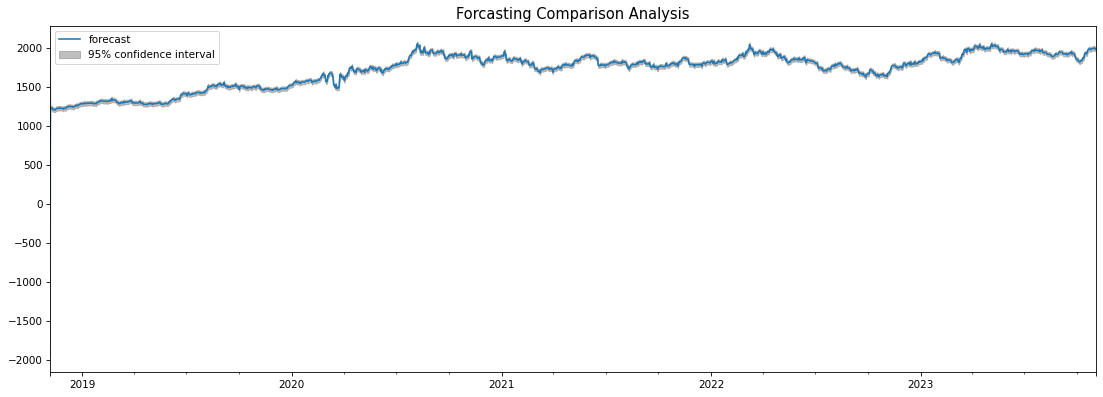

In [ ]:
plt.rcParams.update({'figure.figsize':(18,6), 'figure.dpi':75})
plot_predict(gold_212, dynamic = False)
plt.title('Forcasting Comparison Analysis', fontsize = 14)
plt.show()

Forecasting for a period of 1 year

In [ ]:
index_12_months = pd.date_range(data_gold3.index[-1], freq='MS', periods=9)
index_12_months

DatetimeIndex(['2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01',
               '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01',
               '2024-08-01'],
              dtype='datetime64[ns]', freq='MS')

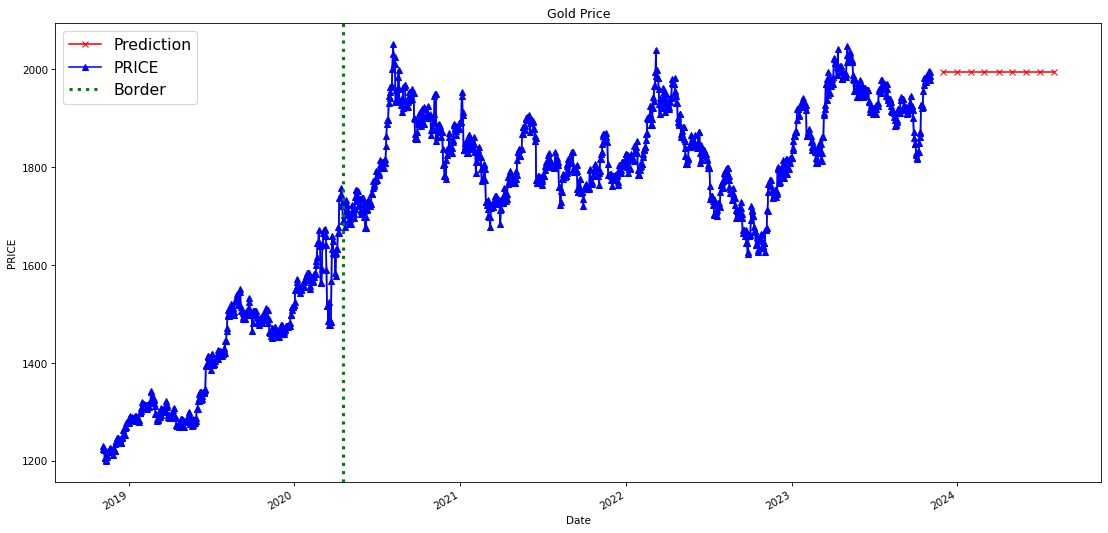

In [ ]:
gold_forecast = gold_212.forecast(12)[0]
gold_forecast = pd.Series(gold_forecast, index=index_12_months)
gold_forecast = gold_forecast.rename("Prediction")

fig, ax = plt.subplots(figsize = (18, 9))
sns.lineplot(x = 'Date', y='PRICE', data=data_gold3, color = 'blue', marker = '^')
gold_forecast.plot(ax = ax, c = 'red', marker = 'x', label = 'Prediction')
data_gold3.plot(ax = ax, c = 'blue', marker = '^')
plt.title('Gold Price')
ax.axvline(x = 18370, ls = ':', linewidth = 3, c = 'green', label = 'Border')
plt.legend(loc = 0, fontsize = 15)
plt.show()

In [ ]:
gold_fcast = gold_forecast.to_frame()
gold_fcast.rename_axis("Date", inplace=True)
gold_fcast.reset_index(inplace=True)
gold_fcast

,Date,Prediction
0,2023-12-01,1994.652021
1,2024-01-01,1994.652021
2,2024-02-01,1994.652021
3,2024-03-01,1994.652021
4,2024-04-01,1994.652021
5,2024-05-01,1994.652021
6,2024-06-01,1994.652021
7,2024-07-01,1994.652021
8,2024-08-01,1994.652021
